## Step 1 :  Importing all the nessesary liberies:- 

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc

## Step 2 :  Data Understanding:- 

In [3]:
dataset = pd.read_csv('Leads.csv')
dataset.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

## Step 3 : DataSet Checking:- 

In [5]:
columns_count = dataset.shape[1]
print('Total Number of Columns: ', columns_count)
dataset.shape

Total Number of Columns:  37


(9240, 37)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
dataset.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000


# Step: 4. Data Understanding:- (Checking for the null values and taking care of that)

#### (seemed the value *Select* appears to have been mistakenly recorded during data collection, despite it not representing a valid data point. This can be substituted with *Unknown* to maintain data integrity and ensure consistency in analysis.)

In [14]:

dataset = dataset.replace('Select', 'Unknown')

## 4.1 Null Checking - Dropping High Null Columns

In [17]:
(dataset.isnull().mean()*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

---
- there was some columns which are having extremely high Null value %.
- We can set the limit of threesold value to 30% is acceptable else that columns will be droped

##### Droping those columns those are having more then 30% of null Values:=
(we are Keeping *Tags* columns because it might be containt importent infromation.)

In [21]:
# keeping columns those are having below 30% of null values:--
dataset = dataset.loc[:, (dataset.isnull().mean() * 100 < 30) | (dataset.columns == 'Tags')]

### Droping Rows that contain empty columns:- 

In [24]:
dataset = dataset[~pd.isnull(dataset['Tags'])]

In [26]:
# again Checking for null values:-
null_columns = dataset.isnull().mean() * 100
null_columns[null_columns > 0].sort_values(ascending=False)

Country                                          21.776796
TotalVisits                                       1.987430
Page Views Per Visit                              1.987430
Last Activity                                     1.596739
What is your current occupation                   1.375913
What matters most to you in choosing a course     1.375913
Lead Profile                                      1.375913
How did you hear about X Education                1.155087
City                                              0.611517
Specialization                                    0.577544
Lead Source                                       0.424665
dtype: float64

In [28]:
# checking shape of the Dataframe after dropping columns with high Null values:-
cols_dropd = columns_count - dataset.shape[1]
print('Number of columns has been dropped: ', cols_dropd)
dataset.shape

Number of columns has been dropped:  5


(5887, 32)

In [30]:
# Checking duplicates
dataset.duplicated().sum()

0

## Dropping *Prospect ID* as its Identifier Columns

In [33]:
dataset.drop(['Prospect ID'], axis=1, inplace=True)

## 3.4 Dropping Categorical Columns, those are having Extreme imbalance of Sub-Categories:- 

In [36]:
# discreteing numerical and categorical columns
num_cols = [col for col in dataset.select_dtypes(include=['float64', 'int64']).columns]
categ_cols = [col for col in dataset.select_dtypes(include=['object', 'category']).columns]

In [38]:
# Preparing a list to store columns need to be drop
colums_to_drop = []
print(f"Category Columns with imbalenced Distribution of sub-categories or single values only:\n")

for col in categ_cols:
    value_count = dataset[col].value_counts(normalize=True)*100
    
    
    if len(value_count) == 1 or value_count.iloc[0] > 90:
        print(value_count)
        print(f"{'-*' * 50}\n")
        colums_to_drop.append(col)

categ_cols = [col for col in categ_cols if col not in colums_to_drop]

colums_to_drop


Category Columns with imbalenced Distribution of sub-categories or single values only:

Do Not Email
No     93.307287
Yes     6.692713
Name: proportion, dtype: float64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Do Not Call
No     99.966027
Yes     0.033973
Name: proportion, dtype: float64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Country
India                   95.808903
United States            0.933768
United Arab Emirates     0.825190
Singapore                0.347448
Saudi Arabia             0.347448
United Kingdom           0.238871
Australia                0.195440
Qatar                    0.173724
Hong Kong                0.130293
Oman                     0.108578
Bahrain                  0.108578
France                   0.108578
South Africa             0.065147
Nigeria                  0.065147
Kuwait                   0.065147
Netherlands              0.0434

['Do Not Email',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [40]:
# checking shape of the Dataframe after dropping Highly imbalenced Columns
dataset = dataset.drop(columns=colums_to_drop)
print('Droped column counts: ', len(colums_to_drop))

dataset.shape

Droped column counts:  15


(5887, 16)

In [42]:
print(num_cols)

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [44]:
print(categ_cols)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


## lets Impute Null values:- 

### Imputing categorical and numerical columns with mode and median respectively

In [48]:
# categorical columns with mode
for col in categ_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [50]:
# numerical columns with median
for col in num_cols:
    dataset[col] = dataset[col].fillna(dataset[col].median())

In [52]:
dataset.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  How did you hear about X Education What is your current occupation  \
0                            Unknown                      Unemployed   
1                            Unknown                      Unemployed   
2                            Unknown                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                                  Tags    Lead Profile     City  \
0          Interested in other courses         Unknown  Unknown   
1                              Ringing         Unknown  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing         Unknown   Mumbai   
4  Will revert after reading the email         Unknown   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [54]:
# checking if any nulls left further:-
dataset.isnull().sum().sum()

0

## Restricting Outliers

In [57]:
import math

def udf_boxplots(dataset, num_cols, cols=3, figsize=(10, 6)):
    
    # It can create boxplots for the given numerical columns in a DataFrame.
    
    # Calculating rows needed for subplots
    row = math.ceil(len(num_cols) / cols)

    # Creating the figure
    figr = plt.figure(figsize=figsize)

    for i, col in enumerate(num_cols):
        ax = plt.subplot(row, cols, i + 1)  # +1 due to subplot indices start at 1
        sns.boxplot(y=dataset[col], ax=ax)
        ax.set_title(f'{col}')

    # To prevent overlap Adjusting layout
    plt.tight_layout()
    plt.show()

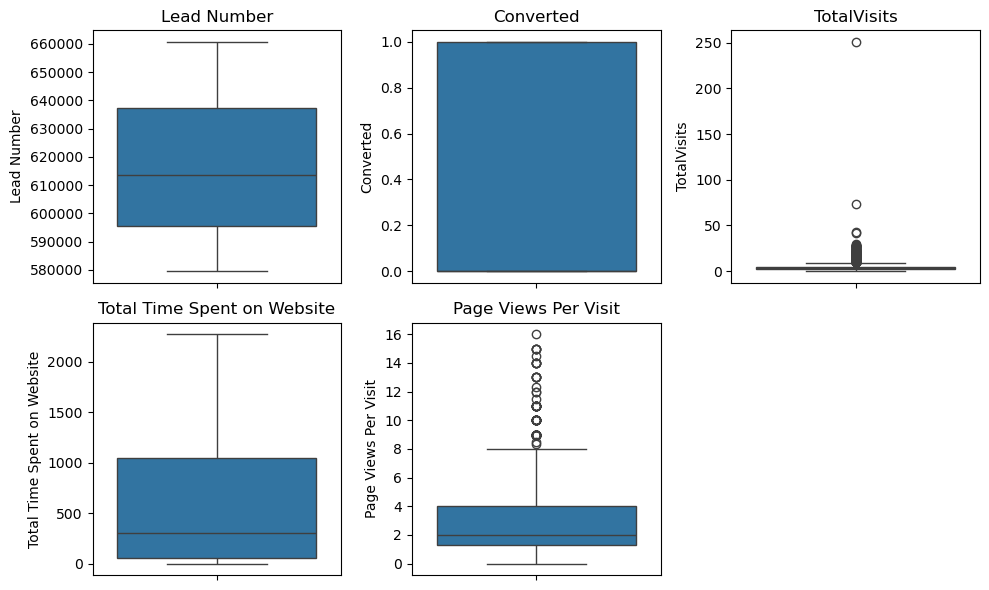

In [59]:
udf_boxplots(dataset, num_cols=num_cols, cols=3)

In [60]:
for col in num_cols:
    
    upper_quantile=0.75
    lower_quartile=0.25
    iqr_multiplier=1.5

    Q1 = dataset[col].quantile(lower_quartile)
    Q3 = dataset[col].quantile(upper_quantile)
            
    IQR = Q3 - Q1   # To calculate the Interquartile Range (IQR)
    
    lower_boundary = Q1 - iqr_multiplier * IQR
    upper_boundary = Q3 + iqr_multiplier * IQR
    
    dataset[col] = np.clip(dataset[col], lower_boundary, upper_boundary)

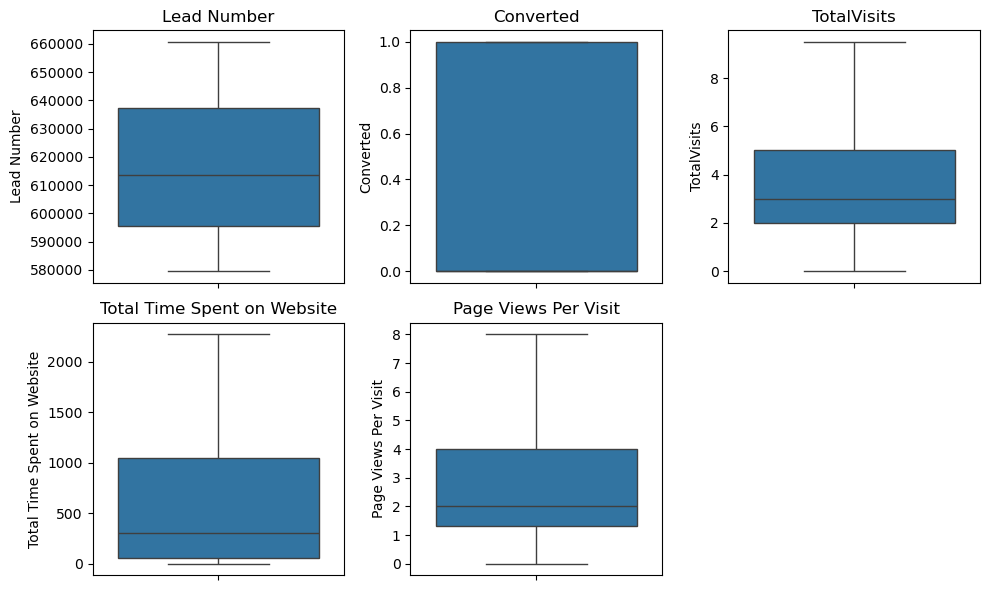

In [61]:
udf_boxplots(dataset, num_cols=num_cols)

## Checking for any kind Spelling Errors & Similar String Values:- 

In [63]:
# Lets Check the value_counts for all categorical columns
for col in dataset[categ_cols].columns[1:]:
    print(dataset[col].value_counts())
    print('\n')

Lead Source
Google               1883
Direct Traffic       1823
Organic Search        804
Olark Chat            685
Reference             526
Referral Sites         74
Facebook               40
Welingak Website       39
Click2call              3
bing                    2
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64


Last Activity
Email Opened                    2319
SMS Sent                        1920
Page Visited on Website          410
Olark Chat Conversation          376
Converted to Lead                289
Email Link Clicked               168
Email Bounced                    165
Form Submitted on Website         79
Unreachable                       73
Unsubscribed                      42
Had a Phone Conversation          28
Approached upfront                 9
View in browser link Clicked       3
Email Received                     2
Email Marked

#### -Updateing 'Google' inplace of 'google'
#### -df['Lead Source'] = df['Lead Source'].replace({'google': 'Google'})
#### -df['Lead Source'].value_counts()

In [65]:
# Categories those are having less than 50 entries:-
low_fre_categ = dataset['Lead Source'].value_counts()[dataset['Lead Source'].value_counts() < 50].index

# Replacing with *Other*
dataset['Lead Source'] = dataset['Lead Source'].replace(low_fre_categ, 'Other')

dataset['Lead Source'].value_counts()

Lead Source
Google            1883
Direct Traffic    1823
Organic Search     804
Olark Chat         685
Reference          526
Other               92
Referral Sites      74
Name: count, dtype: int64

In [68]:
# Checking for Lead Origin
dataset['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    3501
API                        1751
Lead Add Form               595
Lead Import                  40
Name: count, dtype: int64

In [69]:
dataset.shape

(5887, 16)

# Step 5. Exploratory Data Analysis (EDA)

##  5.1:-Checkling for target Imbalance

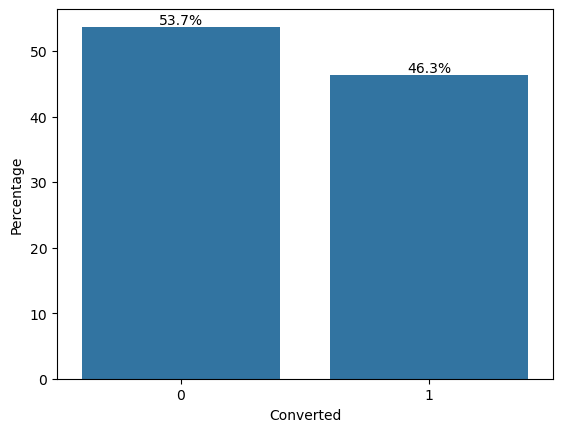

In [71]:
# Lets Calculate the percentage for each category in 'Converted' column
percent_data = dataset['Converted'].value_counts(normalize=True) * 100

# for plot barplot
sns.barplot(x=percent_data.index, y=percent_data.values)

plt.ylabel('Percentage')

# Annotate bars with percentage values
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()

## 5.2 Univariate Analysis - with Numerical features

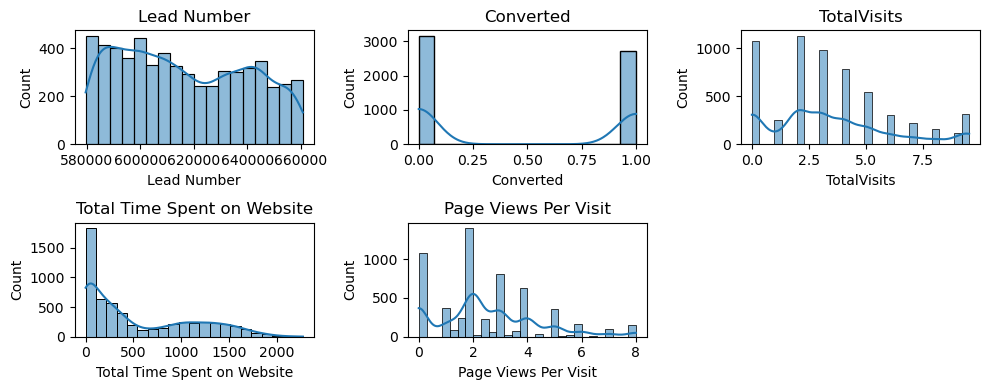

In [75]:
cols = 3
row = math.ceil(len(num_cols) / cols)

figr = plt.figure(figsize=(10, 4))

for i, col in enumerate(num_cols):
    ax = plt.subplot(row, cols, i + 1)  # +1 because subplot indices start at 1
    sns.histplot(data=dataset, x=col, ax=ax, kde=True)
    ax.set_title(f'{col}')

plt.tight_layout()
plt.show()

## 5.3 Univariate Analysis -With  Categorical Features:- 

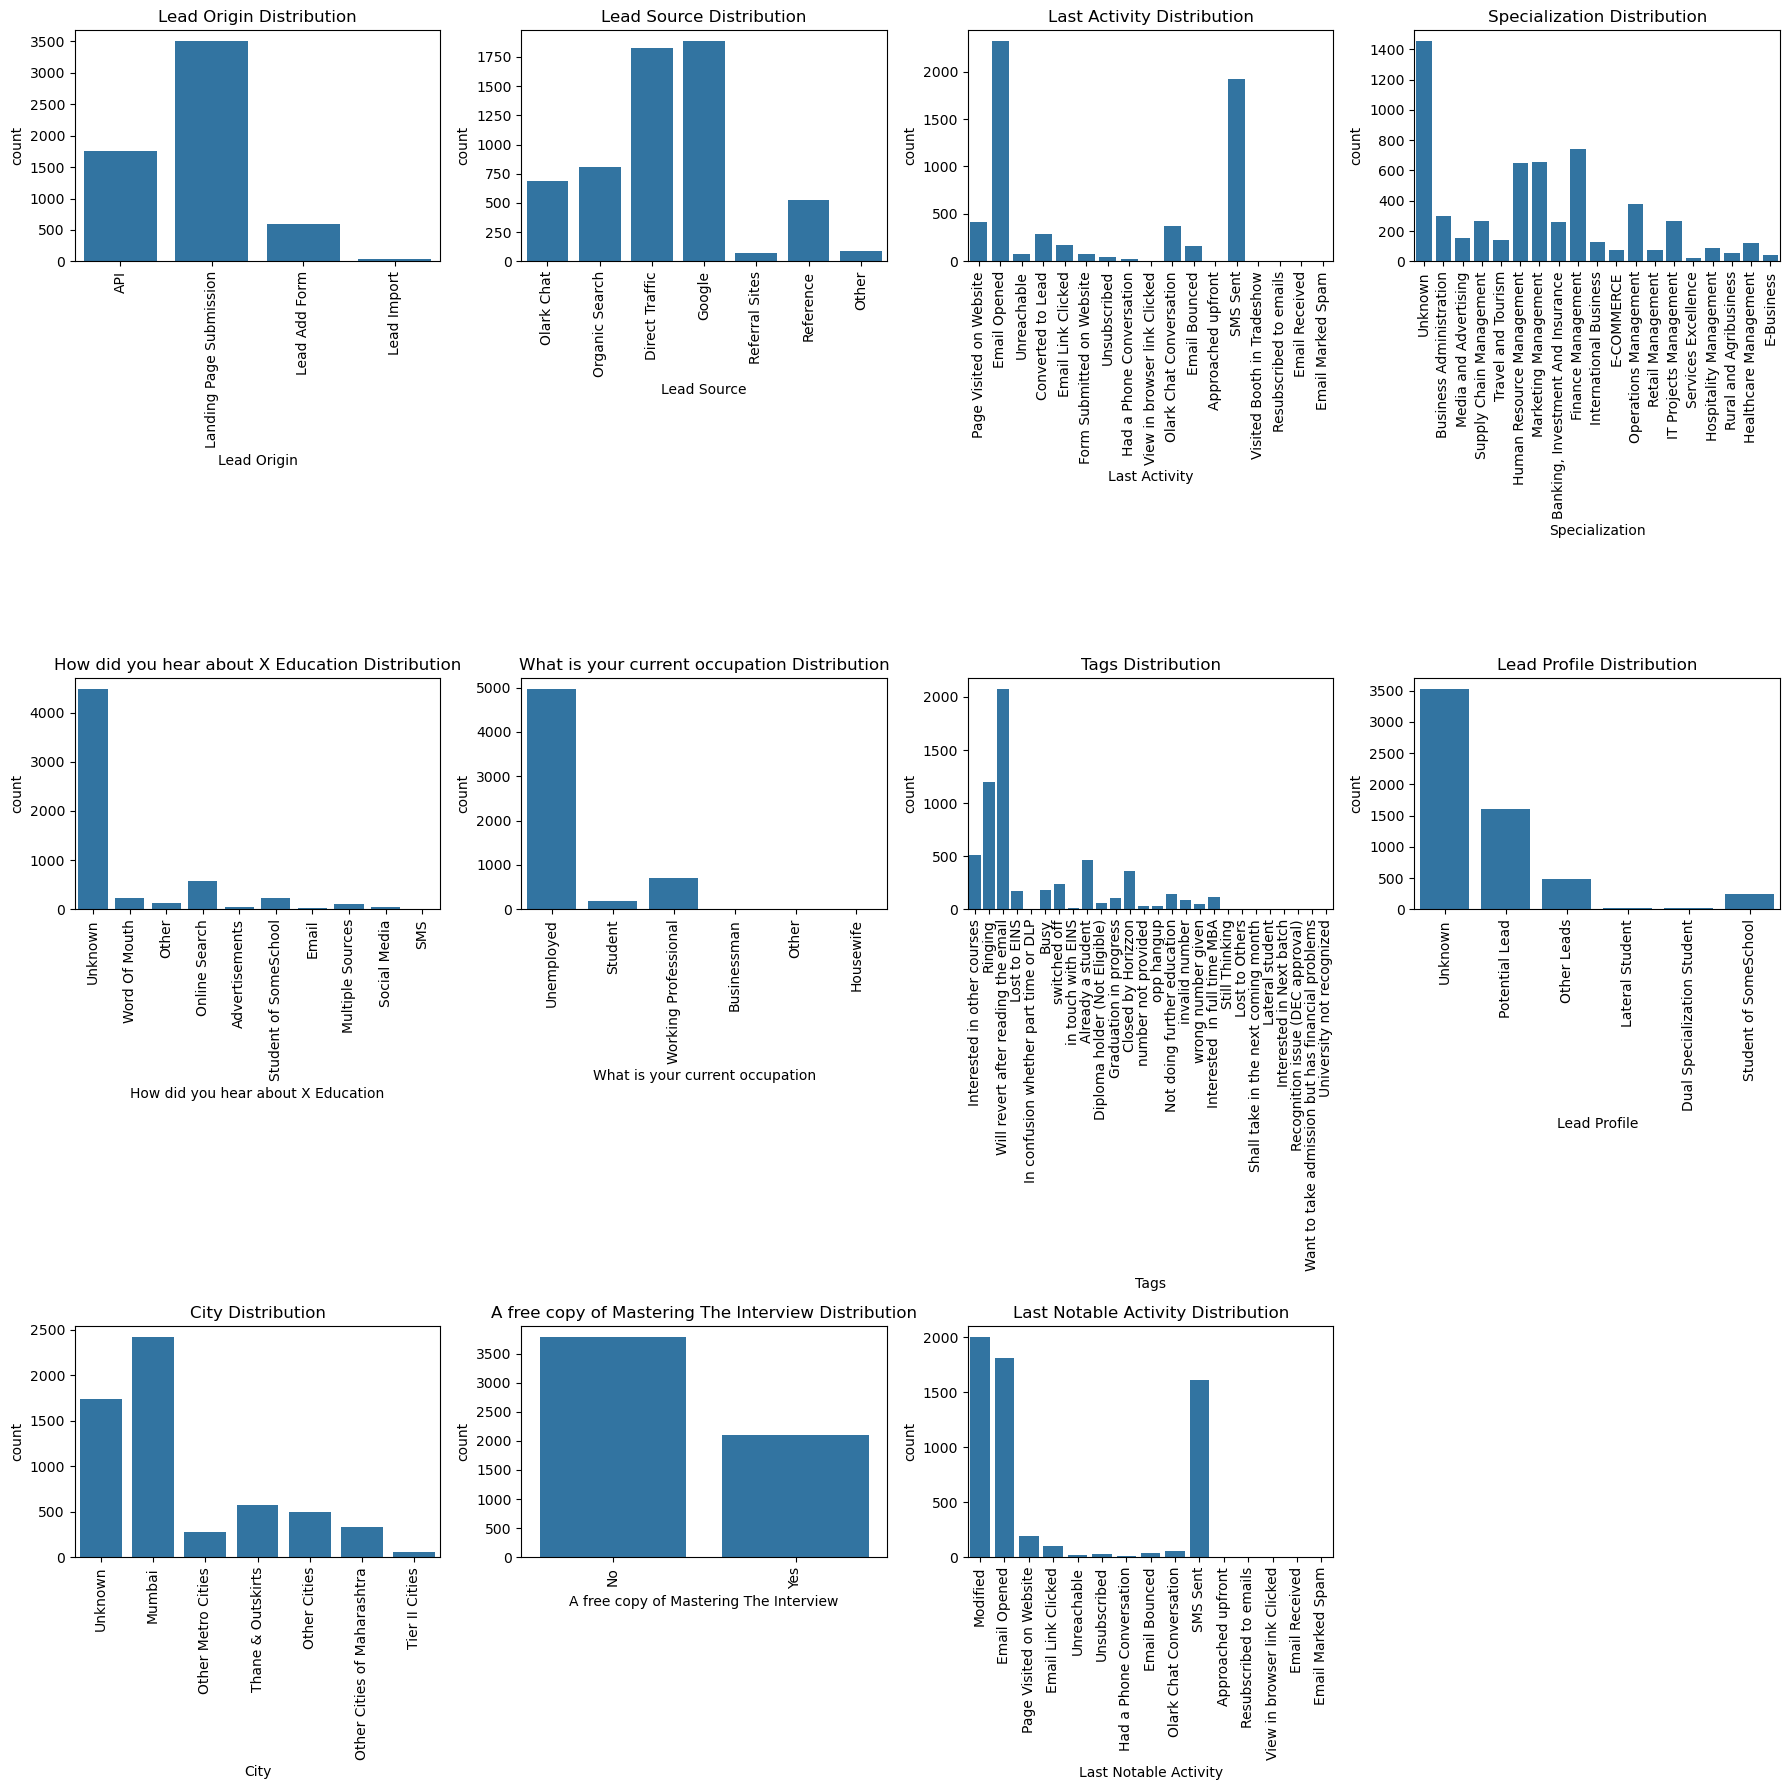

In [81]:
cols = 4

# Calculating rows needed for subplots
row = math.ceil(len(categ_cols) / cols)

figr = plt.figure(figsize=(18, 18))

for i, col in enumerate(categ_cols):
    ax = plt.subplot(row, cols, i + 1)  # +1 because of  subplot indices start at 1
    sns.countplot(x=dataset[col], ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)  # Labeling the x-axis explicitly
    ax.tick_params(axis='x', rotation=90)  # for Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

## 5.4 Bivariate Analysis - With Numerical Features:- 

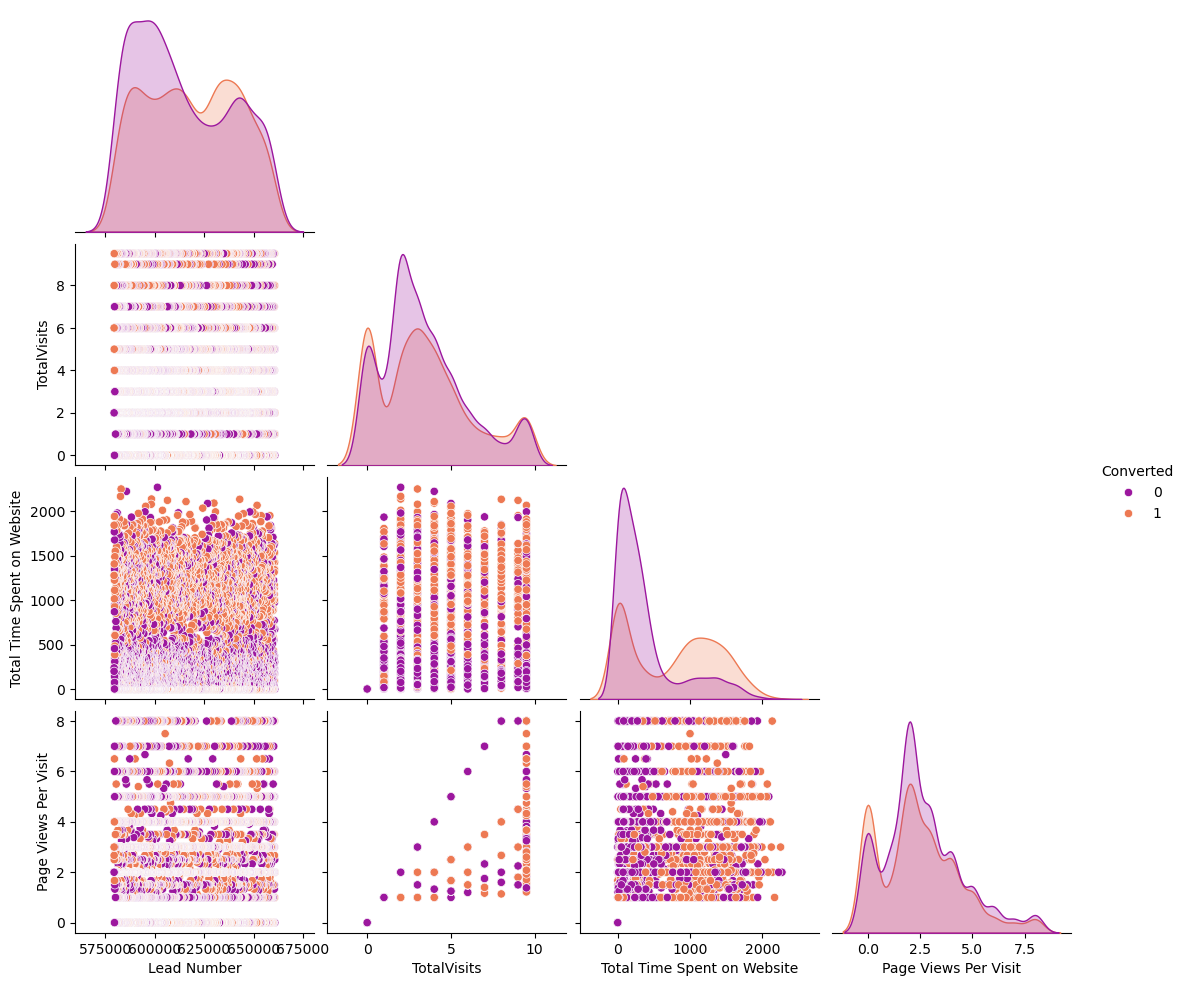

In [83]:
g1 = sns.pairplot(dataset[num_cols], hue='Converted', palette='plasma', corner=True)
g1.figure.set_size_inches(12,10)
plt.show()

<Axes: ylabel='Total Time Spent on Website'>

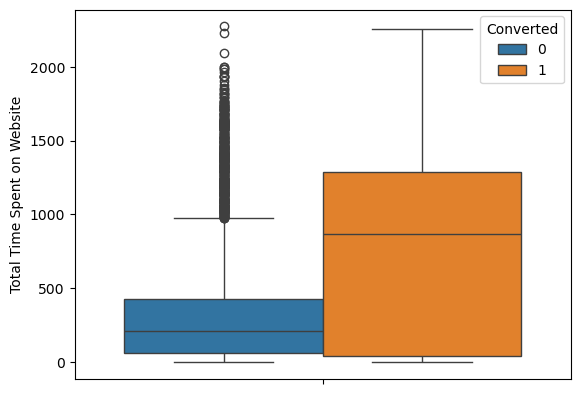

In [84]:
sns.boxplot(data=dataset, y='Total Time Spent on Website', hue='Converted')

**Findings:**
- Their was only one pair that showing the linner relationship is between - *TotalVisits* & *Page Views Per Visit*
- most converted in sales are those who spent maximum time in website

## 5.5 :- Multivariate Analysis:- 

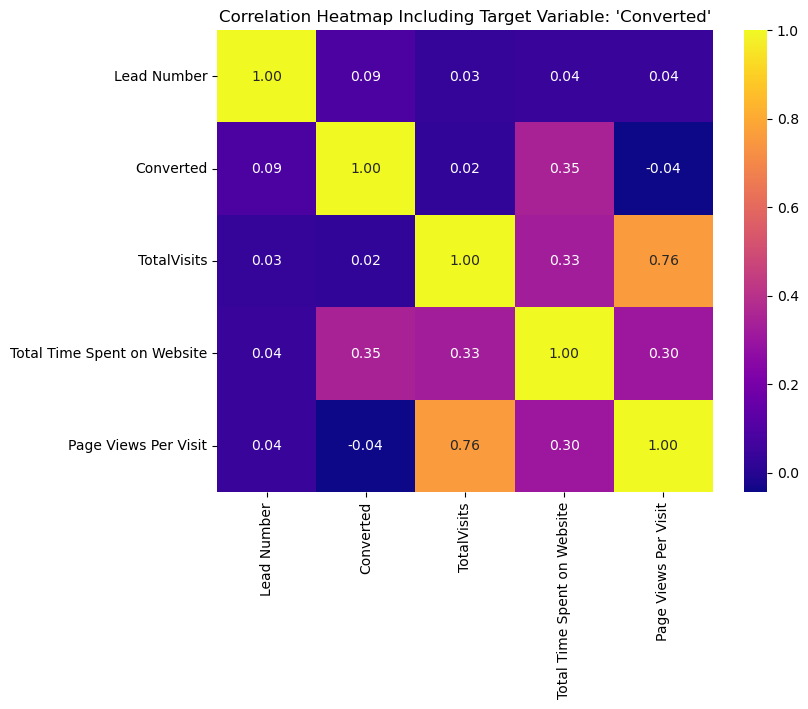

In [87]:
# Calculate correlation matrix(target variable including)
corre_matrix = dataset[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corre_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title("Correlation Heatmap Including Target Variable: 'Converted'")
plt.show()

### **Findings:- **
- There was high correlation observed in between `Page Views Per Visit` & `Total Time Spent on Website`
- There wa good Correlation also observed in between `Total Time Spent on Website` & `Converted` 

-Those who show a strong interest in buying an education program are likely to visit the website more often and spend more time exploring the programs

## Heatmap correlation  - (isolated by Target Feature)

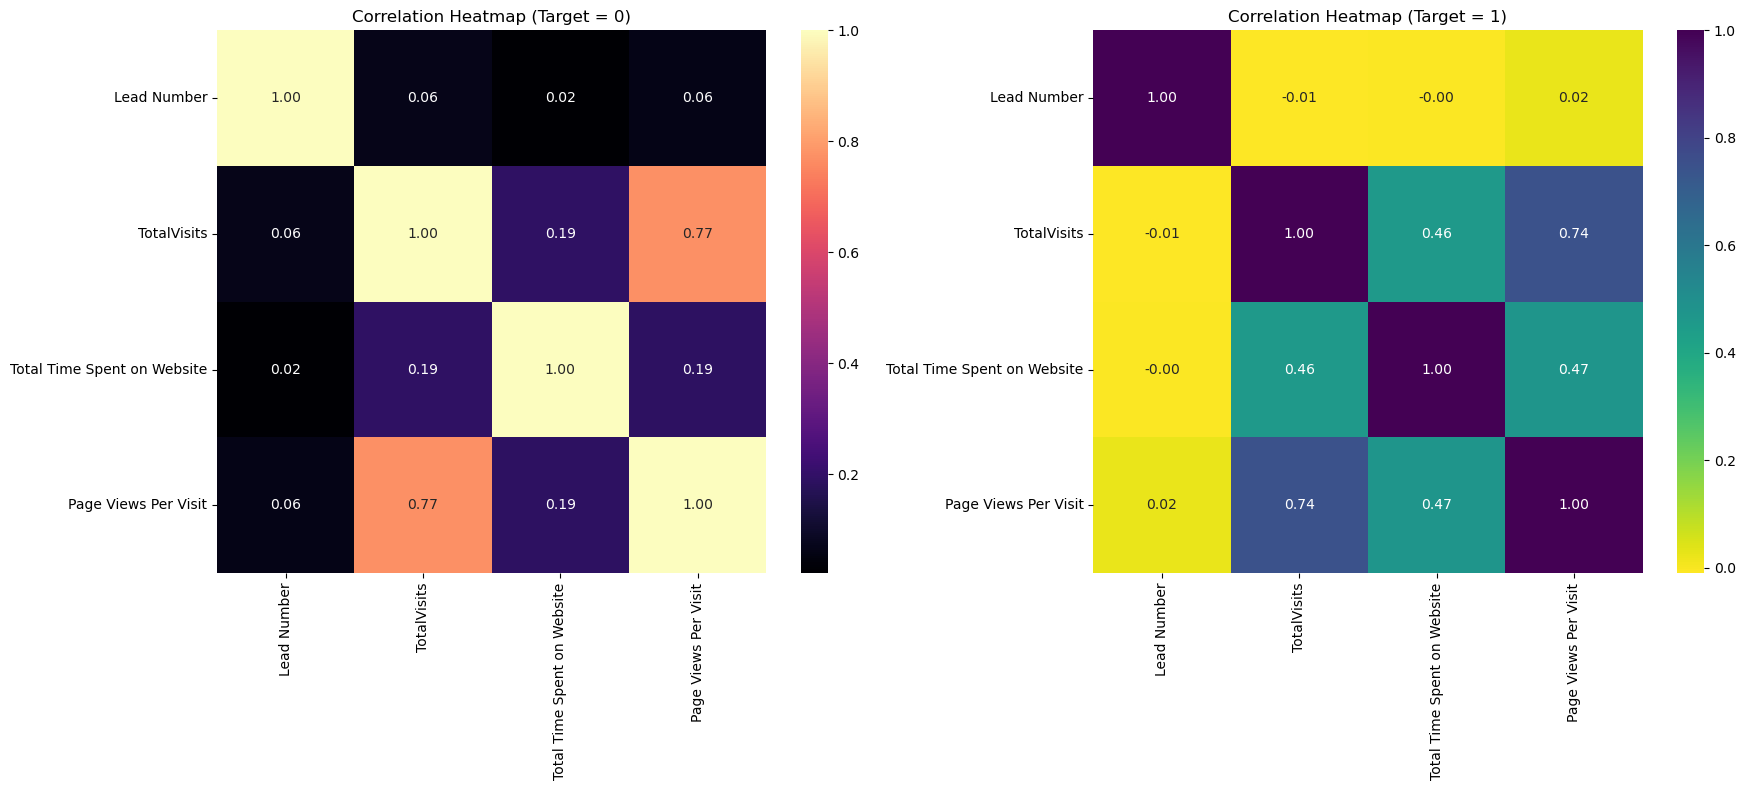

In [91]:
dataset_target_0 = dataset[dataset['Converted'] == 0]  
# Filtering where target = 0

dataset_target_1 = dataset[dataset['Converted'] == 1]  
# Filtering where target = 1

corre_matrix_0 = dataset_target_0[num_cols].drop(columns=['Converted'], errors='ignore').corr()
corre_matrix_1 = dataset_target_1[num_cols].drop(columns=['Converted'], errors='ignore').corr()

# to plot the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(corre_matrix_0, annot=True, cmap='magma', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap (Target = 0)")

sns.heatmap(corre_matrix_1, annot=True, cmap='viridis_r', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap (Target = 1)")

plt.tight_layout()
plt.show()


**Findings:- **
- As per the above heatmap, for the `Converted`=1 , successfully Converted leads,  there was a highly correlation noticed in between -
- 
- - `Total Time Spent on Website` & `TotalVisits`  ==>> 0.47
- - `Total Time Spent on Website` & `Page Views Per Visit` ==>> 0.52

as referred to nonconverted leads.

In [93]:
dataset.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  How did you hear about X Education What is your current occupation  \
0                            Unknown                      Unemployed   
1                            Unknown                      Unemployed   
2                            Unknown                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                                  Tags    Lead Profile     City  \
0          Interested in other courses         Unknown  Unknown   
1                              Ringing         Unknown  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing         Unknown   Mumbai   
4  Will revert after reading the email         Unknown   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [94]:
dataset.shape

(5887, 16)

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5887 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             5887 non-null   int64  
 1   Lead Origin                             5887 non-null   object 
 2   Lead Source                             5887 non-null   object 
 3   Converted                               5887 non-null   int64  
 4   TotalVisits                             5887 non-null   float64
 5   Total Time Spent on Website             5887 non-null   int64  
 6   Page Views Per Visit                    5887 non-null   float64
 7   Last Activity                           5887 non-null   object 
 8   Specialization                          5887 non-null   object 
 9   How did you hear about X Education      5887 non-null   object 
 10  What is your current occupation         5887 non-null   object 
 

# Step:- 6:-  Model Building - On Logistic Regression:-

## 6.1 One Hot Encoding :- 

In [106]:
# lets Convert categorical variables in the dummy variables. (one-hot encoding)
dataset = pd.get_dummies(dataset, columns=categ_cols, drop_first=True, dtype=int)

In [108]:
# let Set *Lead Number* as the DataFrame index
dataset = dataset.set_index('Lead Number',drop=True)
num_cols.remove('Lead Number')

In [110]:
dataset.shape

(5887, 112)

In [112]:
dataset.head()

Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
660737               0          0.0                            0   
660728               0          5.0                          674   
660727               1          2.0                         1532   
660719               0          1.0                          305   
660681               1          2.0                         1428   

             Page Views Per Visit  Lead Origin_Landing Page Submission  \
Lead Number                                                              
660737                        0.0                                    0   
660728                        2.5                                    0   
660727                        2.0                                    1   
660719                        1.0                                    1   
660681                        1.0                                    1   

             Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
Lead Number                                                       
660737                               0                        0   
660728                               0                        0   
660727                               0                        0   
660719                               0                        0   
660681                               0                        0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
660737                        0                       1   
660728                        0                       0   
660727                        0                       0   
660719                        0                       0   
660681                        1                       0   

             Lead Source_Organic Search  ...  \
Lead Number                              ...   
660737                                0  ...   
660728                                1  ...   
660727                                0  ...   
660719                                0  ...   
660681                                0  ...   

             Last Notable Activity_Email Received  \
Lead Number                                         
660737                                          0   
660728                                          0   
660727                                          0   
660719                                          0   
660681                                          0   

             Last Notable Activity_Had a Phone Conversation  \
Lead Number                                                   
660737                                                    0   
660728                                                    0   
660727                                                    0   
660719                                                    0   
660681                                                    0   

             Last Notable Activity_Modified  \
Lead Number                                   
660737                                    1   
660728                                    0   
660727                                    0   
660719                                    1   
660681                                    1   

             Last Notable Activity_Olark Chat Conversation  \
Lead Number                                                  
660737                                                   0   
660728                                                   0   
660727                                                   0   
660719                                                   0   
660681                                                   0   

             Last Notable Activity_Page Visited on Website  \
Lead Number                                                  
660737                                                   0   
660728                         

### 6.2- Training Features : Heatmap Correlation for the Scaled Dummified Dataframe 
- Checking for multi-collinearity we can plot heat map

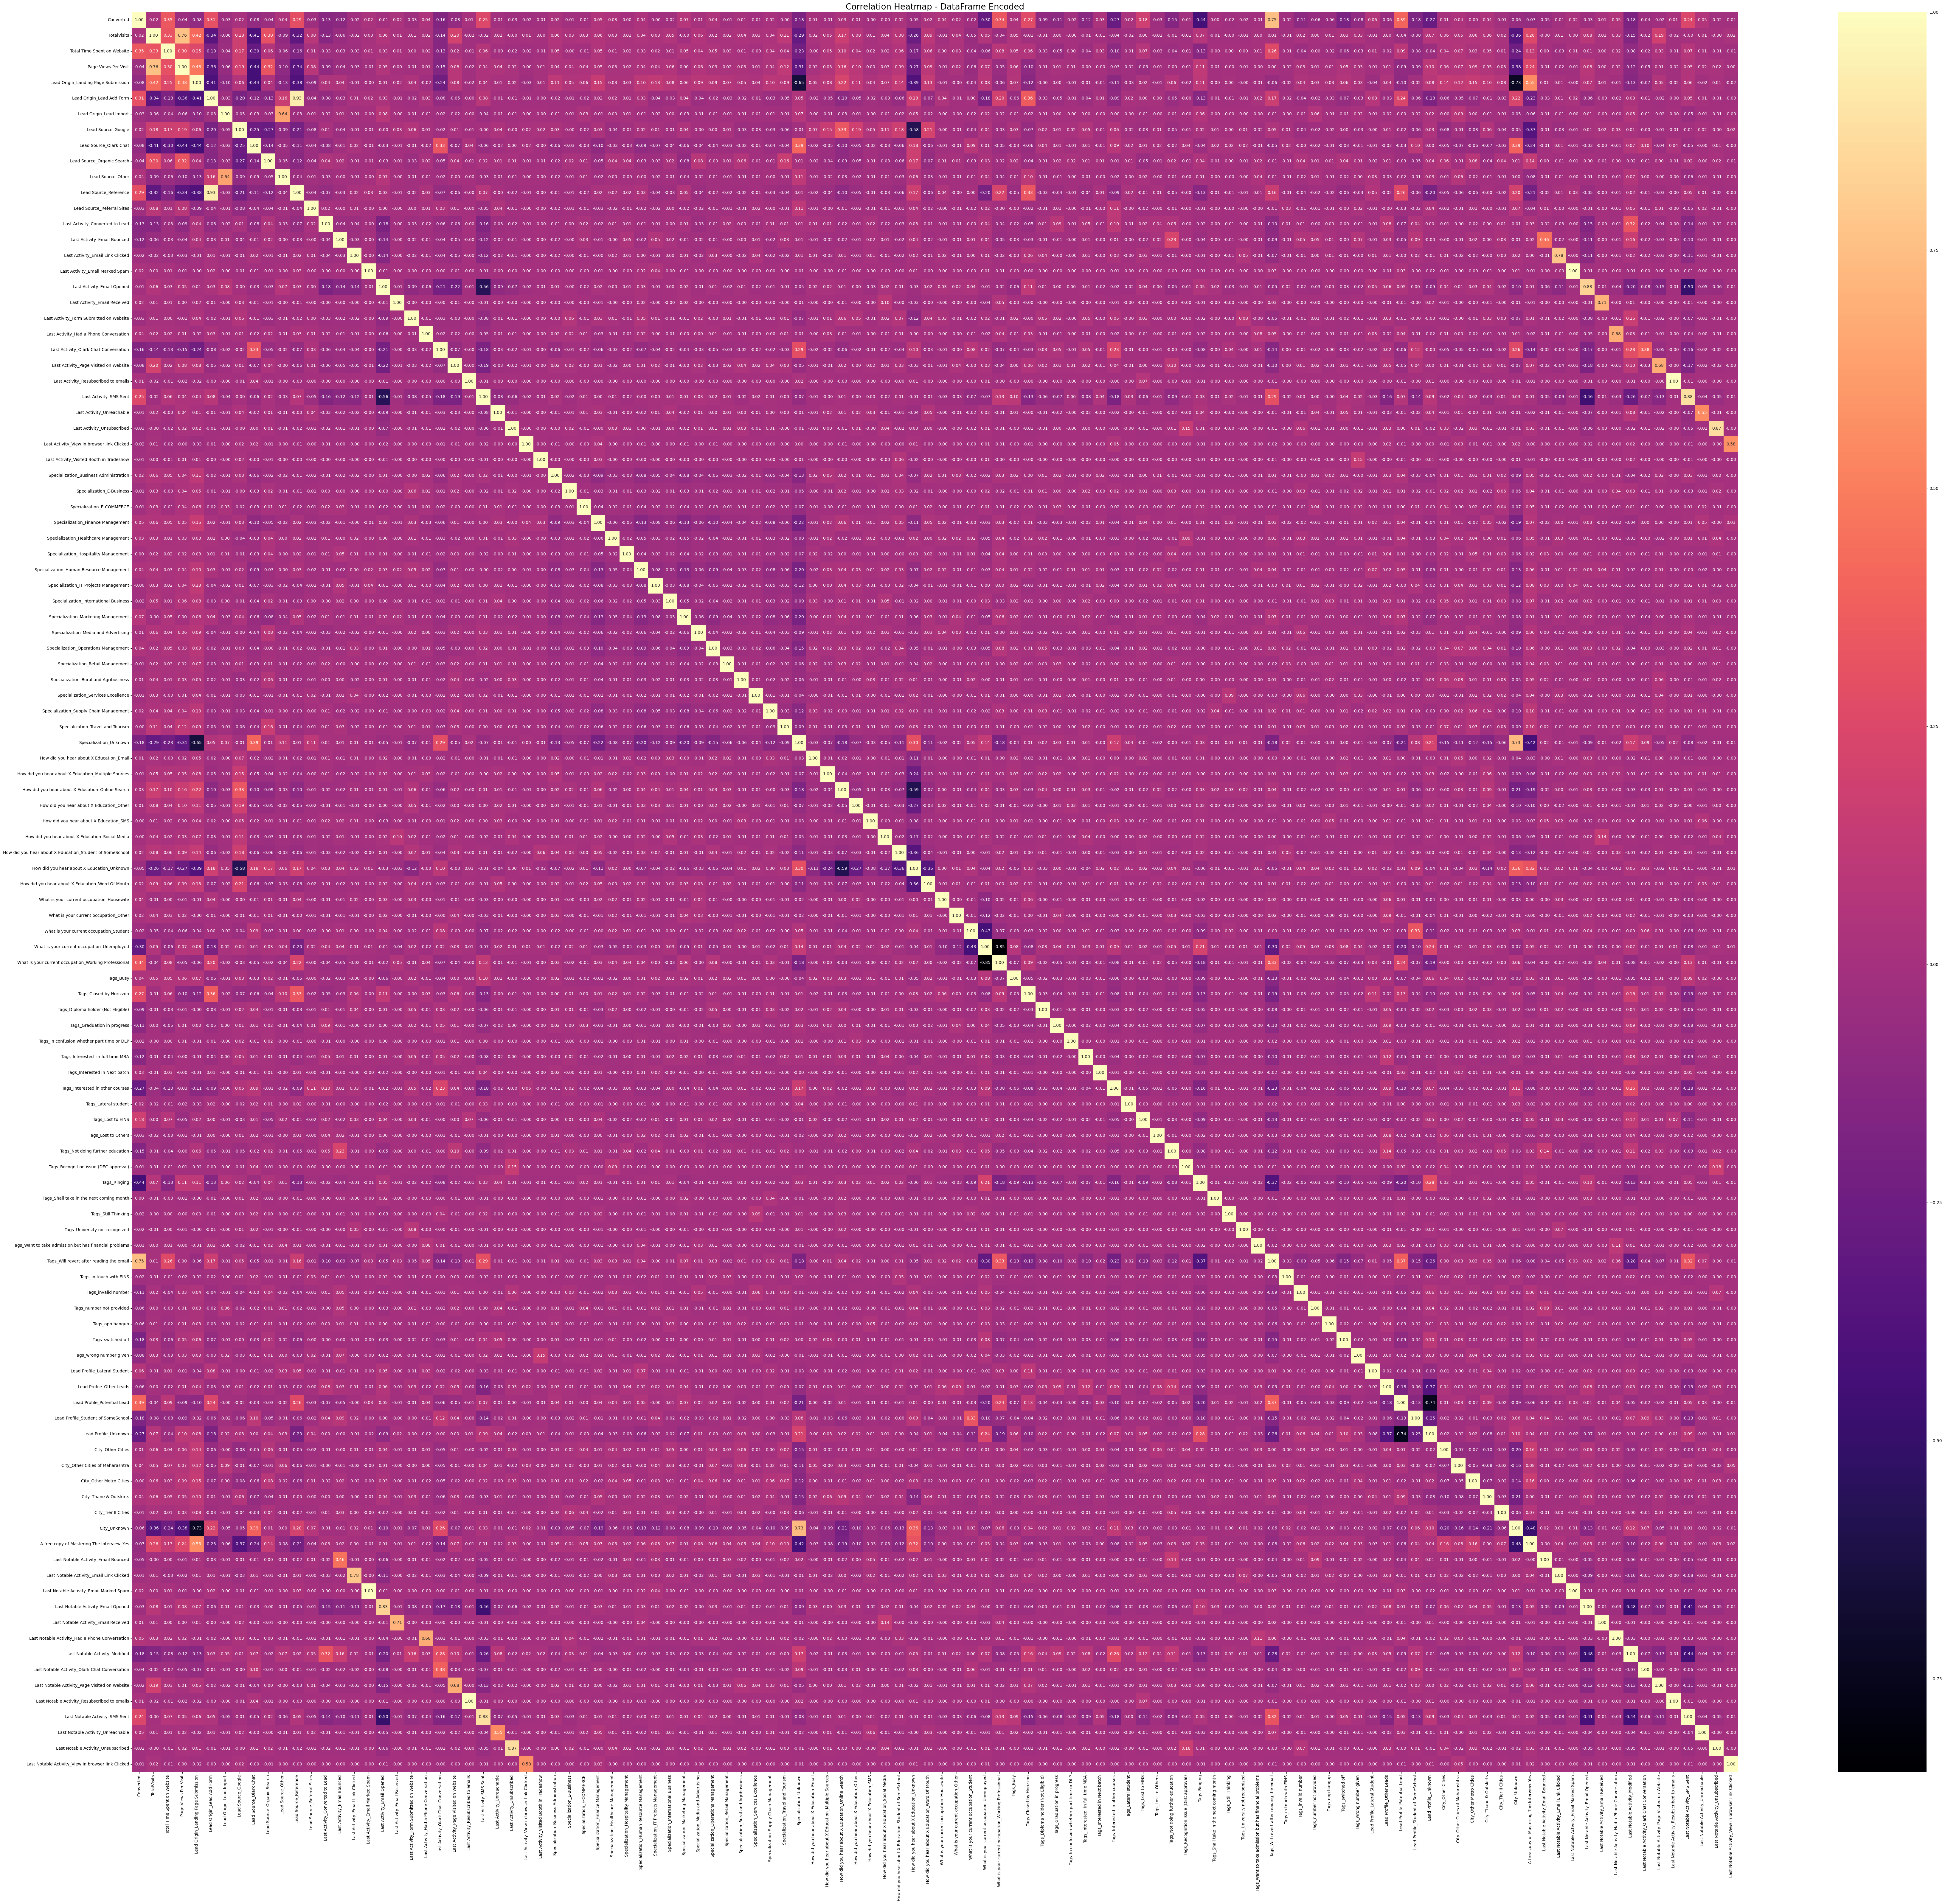

In [115]:
plt.figure(figsize = (72, 64), dpi=100)
sns.heatmap(dataset.corr(), annot = True, cmap="magma", fmt=".2f")
plt.title('Correlation Heatmap - DataFrame Encoded', fontsize=20)
plt.tight_layout()
plt.show()

**findings:-**
- So many features those are extremely high correlation.
- It difficult to check manually and drop those high-correlative features
- For reduce the number of features, Wecan use RFE

## 6.3:-  Train Test Split

In [118]:
X = dataset.drop(columns='Converted')  # Droping target column
y = dataset['Converted']  # Target column

In [119]:
num_cols.remove('Converted')
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [120]:
# Splitting the dataset among Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensions of Train and Test Split
print('Train X Shape is:', X_train.shape)
print('Test X Shape is:', X_test.shape)
print('Train y Shape is:', y_train.shape)
print('Test y Shape is:', y_test.shape)

Train X Shape is: (4709, 111)
Test X Shape is: (1178, 111)
Train y Shape is: (4709,)
Test y Shape is: (1178,)


In [121]:
scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [122]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                                   
600899          0.315789                     0.157570              0.374766   
616706          0.526316                     0.015845              0.624610   
606035          1.000000                     0.698504              0.437227   
580754          0.421053                     0.184419              0.499688   
620918          1.000000                     0.460827              0.174891   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
600899                                         1                          0   
616706                                         1                          0   
606035                                         1                          0   
580754                                         1                          0   
620918                                         1                          0   

             Lead Origin_Lead Import  Lead Source_Google  \
Lead Number                                                
600899                             0                   0   
616706                             0                   0   
606035                             0                   0   
580754                             0                   1   
620918                             0                   0   

             Lead Source_Olark Chat  Lead Source_Organic Search  \
Lead Number                                                       
600899                            0                           0   
616706                            0                           0   
606035                            0                           1   
580754                            0                           0   
620918                            0                           0   

             Lead Source_Other  ...  Last Notable Activity_Email Received  \
Lead Number                     ...                                         
600899                       0  ...                                     0   
616706                       0  ...                                     0   
606035                       0  ...                                     0   
580754                       0  ...                                     0   
620918                       0  ...                                     0   

             Last Notable Activity_Had a Phone Conversation  \
Lead Number                                                   
600899                                                    0   
616706                                                    0   
606035                                                    0   
580754                                                    0   
620918                                                    0   

             Last Notable Activity_Modified  \
Lead Number                                   
600899                                    0   
616706                                    0   
606035                                    0   
580754                                    0   
620918                                    0   

             Last Notable Activity_Olark Chat Conversation  \
Lead Number                                                  
600899                                                   0   
616706                                                   0   
606035                                                   0   
580754                                                   0   
620918                                                   0   

             Last Notable Activity_Page Visited on Website  \
Lead Number                                                  
600899                                                   0   
616706                                                   0   
606035             

## 6.4 :- Recursive Feature Elimination (RFE) method:- 

In [124]:
estimator = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Performing the RFE method for selecting the top 10 features
selector1 = RFE(estimator, n_features_to_select=12)
selector1 = selector1.fit(X_train, y_train)

In [125]:
selectd_features = X_train.columns[selector1.support_]
selectd_features

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [126]:
def calculate_vif(X):
    
    # Creating a dataframe for holding the VIF data
    vif_datas = pd.DataFrame()
    
    # Calculating the VIF for each feature
    vif_datas["feature"] = X.columns
    vif_datas["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Sorting the VIF values as per the  descending order
    return vif_datas.sort_values("VIF", ascending=False)

In [127]:
# Filtering selected features from the dataframe for model building
X_train = X_train[selectd_features]
X_test = X_test[selectd_features]

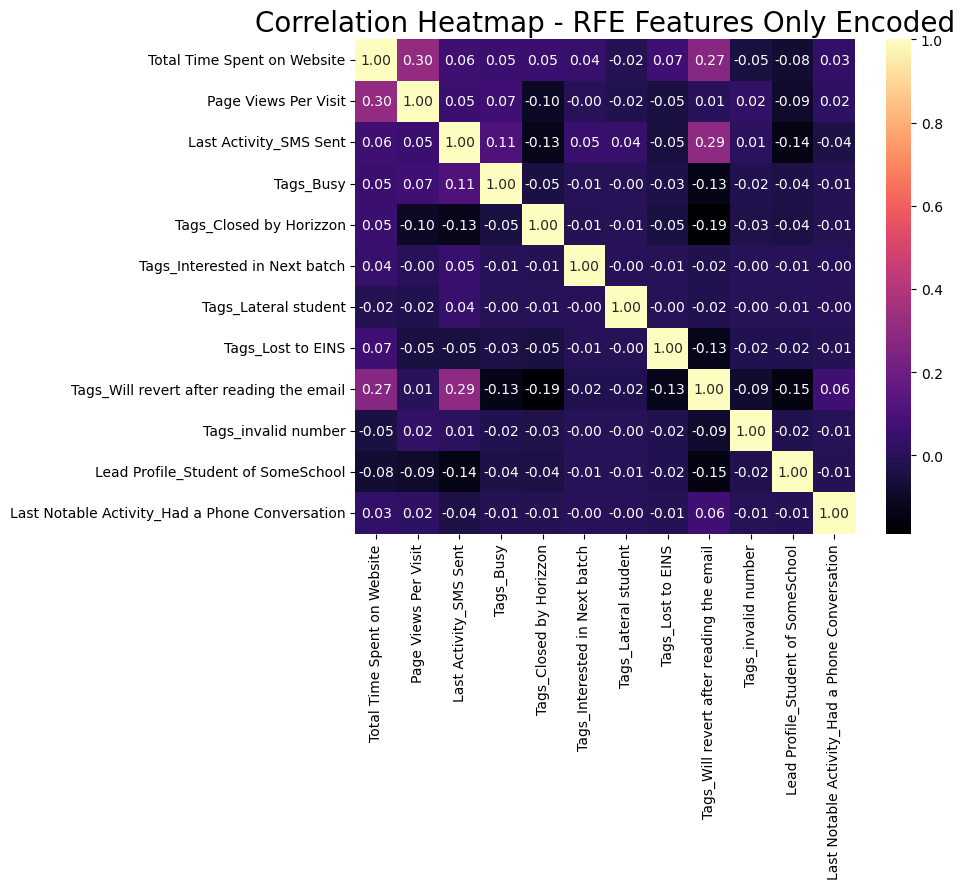

In [128]:
plt.figure(figsize = (10, 9))
sns.heatmap(X_train.corr(),cmap='magma',annot=True, fmt=".2f")
plt.title('Correlation Heatmap - RFE Features Only Encoded', fontsize=20)
plt.tight_layout()
plt.show()

## 6.5:- Building Models

## model 1:-

In [130]:
# for fitting logistic regression model
X_train_sm1 = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4696
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -554.82
Date:                Tue, 21 Jan 2025   Deviance:                       1109.6
Time:                        22:31:33   Pearson chi2:                 3.99e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6823
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.5539      0.223    -20.427      0.000      -4.991      -4.117
Total Time Spent on Website                        3.5017      0.362      9.665      0.000       2.792       4.212
Page Views Per Visit                              -1.1212      0.385     -2.912      0.004      -1.876      -0.366
Last Activity_SMS Sent                             1.3717      0.183      7.507      0.000       1.014       1.730
Tags_Busy                                          3.4874      0.233     14.942      0.000       3.030       3.945
Tags_Closed by Horizzon                            9.6662      1.019      9.489      0.000       7.670      11.663
Tags_Interested in Next batch                     26.5958   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Tags_Lateral student                              27.5500   7.52e+04      0.000      1.000   -1.47e+05    1.47e+05
Tags_Lost to EINS                                  7.8151      0.635     12.307      0.000       6.571       9.060
Tags_Will revert after reading the email           6.9841      0.212     32.983      0.000       6.569       7.399
Tags_invalid number                              -21.1969   1.51e+04     -0.001      0.999   -2.96e+04    2.95e+04
Lead Profile_Student of SomeSchool                -2.2798      0.916     -2.489      0.013      -4.075      -0.484
Last Notable Activity_Had a Phone Conversation    26.6281   3.53e+04      0.001      0.999   -6.92e+04    6.92e+04
==================================================================================================================
"""

In [131]:
vif = calculate_vif(X_train_sm1)
vif

feature       VIF
0                                            const  4.468997
9         Tags_Will revert after reading the email  1.379955
1                      Total Time Spent on Website  1.265488
2                             Page Views Per Visit  1.159827
3                           Last Activity_SMS Sent  1.151604
5                          Tags_Closed by Horizzon  1.108990
4                                        Tags_Busy  1.069149
11              Lead Profile_Student of SomeSchool  1.058297
8                                Tags_Lost to EINS  1.056940
10                             Tags_invalid number  1.016076
12  Last Notable Activity_Had a Phone Conversation  1.007882
6                    Tags_Interested in Next batch  1.007494
7                             Tags_Lateral student  1.003474

**Findings**
- There are several few number of features with very high p-values. 
- We start droping from the - `Last Notable Activity_Had a Phone Conversation`

In [133]:
X_train = X_train.drop(columns='Last Notable Activity_Had a Phone Conversation')
X_test = X_test.drop(columns='Last Notable Activity_Had a Phone Conversation')

### Model 2

In [135]:
# 2nd Model
X_train_sm2 = sm.add_constant(X_train)
model_2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4697
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -560.13
Date:                Tue, 21 Jan 2025   Deviance:                       1120.3
Time:                        22:31:33   Pearson chi2:                 4.03e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6816
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5266      0.221    -20.469      0.000      -4.960      -4.093
Total Time Spent on Website                  3.4561      0.360      9.611      0.000       2.751       4.161
Page Views Per Visit                        -1.0679      0.383     -2.790      0.005      -1.818      -0.318
Last Activity_SMS Sent                       1.3478      0.182      7.418      0.000       0.992       1.704
Tags_Busy                                    3.4655      0.232     14.932      0.000       3.011       3.920
Tags_Closed by Horizzon                      9.6364      1.018      9.463      0.000       7.640      11.632
Tags_Interested in Next batch               26.5967   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Tags_Lateral student                        27.5464   7.52e+04      0.000      1.000   -1.47e+05    1.47e+05
Tags_Lost to EINS                            7.7862      0.634     12.273      0.000       6.543       9.030
Tags_Will revert after reading the email     6.9688      0.210     33.145      0.000       6.557       7.381
Tags_invalid number                        -21.2031   1.51e+04     -0.001      0.999   -2.97e+04    2.96e+04
Lead Profile_Student of SomeSchool          -2.2941      0.914     -2.511      0.012      -4.085      -0.503
============================================================================================================
"""

In [136]:
vif = calculate_vif(X_train_sm2)
vif

feature       VIF
0                                      const  4.468896
9   Tags_Will revert after reading the email  1.373616
1                Total Time Spent on Website  1.265482
2                       Page Views Per Visit  1.159409
3                     Last Activity_SMS Sent  1.147546
5                    Tags_Closed by Horizzon  1.108968
4                                  Tags_Busy  1.069114
11        Lead Profile_Student of SomeSchool  1.058260
8                          Tags_Lost to EINS  1.056938
10                       Tags_invalid number  1.016076
6              Tags_Interested in Next batch  1.007485
7                       Tags_Lateral student  1.003465

**Findings**
- There was a few number features with very high p-values. 
- We can drop - *Tags_Lateral student* and retry again.

In [138]:
X_train = X_train.drop(columns='Tags_Lateral student')
X_test = X_test.drop(columns='Tags_Lateral student')

### Model 3

In [140]:
# 3rd Model
X_train_sm3 = sm.add_constant(X_train)
model_3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4698
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -568.97
Date:                Tue, 21 Jan 2025   Deviance:                       1137.9
Time:                        22:31:33   Pearson chi2:                 3.99e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6804
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4552      0.217    -20.525      0.000      -4.881      -4.030
Total Time Spent on Website                  3.3984      0.355      9.570      0.000       2.702       4.094
Page Views Per Visit                        -1.1486      0.380     -3.025      0.002      -1.893      -0.404
Last Activity_SMS Sent                       1.3930      0.181      7.715      0.000       1.039       1.747
Tags_Busy                                    3.4153      0.230     14.828      0.000       2.964       3.867
Tags_Closed by Horizzon                      9.5866      1.018      9.420      0.000       7.592      11.581
Tags_Interested in Next batch               26.5093   5.59e+04      0.000      1.000    -1.1e+05     1.1e+05
Tags_Lost to EINS                            7.7428      0.634     12.215      0.000       6.500       8.985
Tags_Will revert after reading the email     6.9207      0.208     33.273      0.000       6.513       7.328
Tags_invalid number                        -21.2565   1.51e+04     -0.001      0.999   -2.97e+04    2.96e+04
Lead Profile_Student of SomeSchool          -2.3037      0.909     -2.535      0.011      -4.085      -0.523
============================================================================================================
"""

In [141]:
vif = calculate_vif(X_train_sm3)
vif

feature       VIF
0                                      const  4.464162
8   Tags_Will revert after reading the email  1.371900
1                Total Time Spent on Website  1.265471
2                       Page Views Per Visit  1.158552
3                     Last Activity_SMS Sent  1.145233
5                    Tags_Closed by Horizzon  1.108798
4                                  Tags_Busy  1.068890
10        Lead Profile_Student of SomeSchool  1.058187
7                          Tags_Lost to EINS  1.056830
9                        Tags_invalid number  1.016026
6              Tags_Interested in Next batch  1.007463

**OBSERVATIONS**
- There was a few number of features with very high p-values. 
- We can drop - *Tags_invalid number* and retry.

In [143]:
X_train = X_train.drop(columns='Tags_invalid number')
X_test = X_test.drop(columns='Tags_invalid number')

### Model 4

In [145]:
# 4th Model
X_train_sm4 = sm.add_constant(X_train)
model_4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial()).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4699
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -571.28
Date:                Tue, 21 Jan 2025   Deviance:                       1142.6
Time:                        22:31:34   Pearson chi2:                 4.04e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6801
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4801      0.217    -20.662      0.000      -4.905      -4.055
Total Time Spent on Website                  3.3789      0.353      9.585      0.000       2.688       4.070
Page Views Per Visit                        -1.1315      0.379     -2.988      0.003      -1.874      -0.389
Last Activity_SMS Sent                       1.3776      0.180      7.646      0.000       1.025       1.731
Tags_Busy                                    3.4478      0.230     14.991      0.000       2.997       3.899
Tags_Closed by Horizzon                      9.6114      1.018      9.445      0.000       7.617      11.606
Tags_Interested in Next batch               23.5520   1.25e+04      0.002      0.998   -2.44e+04    2.45e+04
Tags_Lost to EINS                            7.7668      0.634     12.259      0.000       6.525       9.009
Tags_Will revert after reading the email     6.9478      0.208     33.453      0.000       6.541       7.355
Lead Profile_Student of SomeSchool          -2.2965      0.912     -2.517      0.012      -4.084      -0.509
============================================================================================================
"""

In [146]:
vif = calculate_vif(X_train_sm4)
vif

feature       VIF
0                                     const  4.420434
8  Tags_Will revert after reading the email  1.357902
1               Total Time Spent on Website  1.265149
2                      Page Views Per Visit  1.158151
3                    Last Activity_SMS Sent  1.144169
5                   Tags_Closed by Horizzon  1.106258
4                                 Tags_Busy  1.066772
9        Lead Profile_Student of SomeSchool  1.056439
7                         Tags_Lost to EINS  1.055450
6             Tags_Interested in Next batch  1.007388

**OBSERVATIONS**
- There was a few number of features with very high p-values. 
- We can drop -*Tags_Interested in Next batch* - and retry again.

In [148]:
X_train = X_train.drop(columns='Tags_Interested in Next batch')
X_test = X_test.drop(columns='Tags_Interested in Next batch')

### Model 5

In [150]:
#5th Model
X_train_sm5 = sm.add_constant(X_train)
model_5 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial()).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4700
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -580.59
Date:                Tue, 21 Jan 2025   Deviance:                       1161.2
Time:                        22:31:34   Pearson chi2:                 4.05e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6788
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4580      0.215    -20.777      0.000      -4.879      -4.037
Total Time Spent on Website                  3.4602      0.347      9.966      0.000       2.780       4.141
Page Views Per Visit                        -1.1929      0.375     -3.177      0.001      -1.929      -0.457
Last Activity_SMS Sent                       1.4433      0.179      8.076      0.000       1.093       1.794
Tags_Busy                                    3.3894      0.229     14.799      0.000       2.940       3.838
Tags_Closed by Horizzon                      9.5875      1.017      9.423      0.000       7.593      11.582
Tags_Lost to EINS                            7.7425      0.634     12.214      0.000       6.500       8.985
Tags_Will revert after reading the email     6.9136      0.207     33.392      0.000       6.508       7.319
Lead Profile_Student of SomeSchool          -2.3014      0.907     -2.537      0.011      -4.080      -0.523
============================================================================================================
"""

In [151]:
vif = calculate_vif(X_train_sm5)
vif

feature       VIF
0                                     const  4.419505
7  Tags_Will revert after reading the email  1.352959
1               Total Time Spent on Website  1.261379
2                      Page Views Per Visit  1.157503
3                    Last Activity_SMS Sent  1.140222
5                   Tags_Closed by Horizzon  1.105790
4                                 Tags_Busy  1.066121
8        Lead Profile_Student of SomeSchool  1.056371
6                         Tags_Lost to EINS  1.055089

**OBSERVATIONS**
- Seems like all are good in this case.

- - All p-values within acceptable limits and All VIF values below 5.

### Final Model
Cosidering MOdel 5 as for the future predicion abd analysis.

In [154]:
Final_model = model_5

### Add a constant to the test set for evaluation

In [245]:
X_test_sm5 = sm.add_constant(X_test)

# Step 7:. Model Evaluation

- "Given that the p-values and VIFs look acceptable, we can move forward with making predictions using the most recent stable model. Initially, we'll test with a threshold of 0.5 before evaluating with the optimal threshold"

## Quick Metrics Comparison between Training and Test

In [247]:
# as per Training Data Predictions:- 
y_train_predi = Final_model.predict(X_train_sm5)
y_train_predi_binary = (y_train_predi > 0.5).astype(int)

# As per Test Data predictions :-
y_test_predi = Final_model.predict(X_test_sm5)
y_test_predi_binary = (y_test_predi > 0.5).astype(int)

#Training Performance
print("Training Performance is :")
print(classification_report(y_train, y_train_predi_binary))
print("Confusion Matrix (Training) is :")
print(confusion_matrix(y_train, y_train_predi_binary))

print('-*'*50)

#Test Performance
print("Test Performance is:")
print(classification_report(y_test, y_test_predi_binary))
print("Confusion Matrix (Test) is:")
print(confusion_matrix(y_test, y_test_predi_binary))

Training Performance is :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2502
           1       0.96      0.96      0.96      2207

    accuracy                           0.96      4709
   macro avg       0.96      0.96      0.96      4709
weighted avg       0.96      0.96      0.96      4709

Confusion Matrix (Training) is :
[[2417   85]
 [  85 2122]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Test Performance is:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       660
           1       0.95      0.97      0.96       518

    accuracy                           0.97      1178
   macro avg       0.96      0.97      0.97      1178
weighted avg       0.97      0.97      0.97      1178

Confusion Matrix (Test) is:
[[636  24]
 [ 16 502]]


## 7.1 lets Cross Validate the Scores on Training Dataset:-

In [249]:
# K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining logistic regression model
log_regr = LogisticRegression(max_iter=10000, random_state=42)

# Cross-Validation scores with Stratified K-Fold
cv_score = cross_val_score(log_regr, X_train_sm5, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores is:", cv_score)
print(f"Mean CV Accuracy is: {cv_score.mean() * 100:.2f}% (+/- {cv_score.std() * 2 * 100:.2f}%)")

Cross-Validation Scores is: [0.96178344 0.9670913  0.95329087 0.96921444 0.95961743]
Mean CV Accuracy is: 96.22% (+/- 1.13%)


## 7.2 New DataFrame Creration for Predictions on Training Set

In [254]:
# Useing 'predict' for predicting the probabilities as per the train set
y_train_predi = Final_model.predict(X_train_sm5)
y_train_predi[:10]

Lead Number
600899   0.012
616706   0.961
606035   0.997
580754   0.045
620918   0.042
615069   0.979
628273   0.997
588844   0.989
657183   0.015
590414   0.015
dtype: float64

In [256]:
y_train_pred_dataset = pd.DataFrame({'Lead Number':y_train_predi.index,'Converted':y_train.values,'Conversion_Prob':y_train_predi.values})
y_train_pred_dataset.head()

Lead Number  Converted  Conversion_Prob
0       600899          0            0.012
1       616706          1            0.961
2       606035          1            0.997
3       580754          0            0.045
4       620918          0            0.042

### new column Creating for 'Predicted' value with 1 if Pred_Prob > 0.5 else 0 :-

In [259]:
y_train_pred_dataset['Predicted'] = y_train_pred_dataset['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_dataset.head()

Lead Number  Converted  Conversion_Prob  Predicted
0       600899          0            0.012          0
1       616706          1            0.961          1
2       606035          1            0.997          1
3       580754          0            0.045          0
4       620918          0            0.042          0

## 7.3 Evaluation Metrics

### Classification Report and Confusion Matrix on Train Set

In [267]:
from sklearn import metrics
print("Training Performance is :")
classification_Report  = metrics.classification_report(y_train_pred_dataset['Converted'], y_train_pred_dataset['Predicted'])
print(classification_Report)

print("Confusion Matrix (Training) is :")
confusion_Matrix = metrics.confusion_matrix(y_train_pred_dataset['Converted'], y_train_pred_dataset['Predicted'])
print(confusion_Matrix)

Training Performance is :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2502
           1       0.96      0.96      0.96      2207

    accuracy                           0.96      4709
   macro avg       0.96      0.96      0.96      4709
weighted avg       0.96      0.96      0.96      4709

Confusion Matrix (Training) is :
[[2417   85]
 [  85 2122]]


### Checking Accuracy :- 

In [270]:
round(metrics.accuracy_score(y_train_pred_dataset['Converted'], y_train_pred_dataset['Predicted']), 4)

0.9639

### checking with Other Evaluation Metrics :

In [273]:
# Let's go through the other metrics as well for evaluation:- 

TP = confusion_Matrix[1,1] 
# true positive 
TN = confusion_Matrix[0,0] 
# true negatives
FP = confusion_Matrix[0,1] 
# false positives
FN = confusion_Matrix[1,0] 
# false negatives

### Checking Sensitivity : (Recall)

In [276]:
round(TP/(TP+FN), 4)

0.9615

### Checking Specificity

In [279]:
round(TN/(TN+FP), 4)

0.966

### Checking False Postive Rate : (1 - Specificity)

In [283]:
# Predicting conversion when customer doesn't convert
round(FP/ (TN+FP), 4)

0.034

### Checking Positive predictive value : (Precision)

In [286]:
round(TP / (TP+FP), 4)

0.9615

### Checking Negative predictive value

In [289]:
round(TN / (TN+ FN), 4)

0.966

## Ploting ROC AUC

In [301]:
def plot_roc_auc(y_actual, y_pred_prob):
    #lets Calculate and plot the ROC curve and AUC for classification model.
    # Computing ROC curve and AUC
    
    fpr, tpr, _ = roc_curve(y_actual, y_pred_prob, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)

    #Ploting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    return None

Training Performance is:


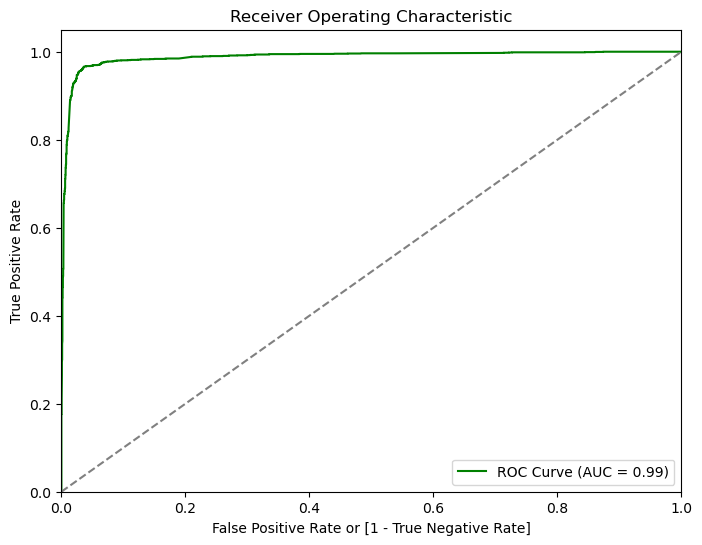

In [303]:
print("Training Performance is:")
plot_roc_auc(y_train_pred_dataset['Converted'], y_train_pred_dataset['Conversion_Prob'])

**Findings:-**
- The ROC curve, with an AUC of 0.99, shows that the logistic regression model is performing extremely well. This implies the model is highly effective at distinguishing between positive and negative classes, accurately classifying instances into their respective categories.

#### "For the above evaluation, we chose a threshold value of 0.5. Next, we will attempt to determine the optimal threshold value

## Let's Find Optimal Cutoff probability:- 

In [306]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_dataset[i]= y_train_pred_dataset['Conversion_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_dataset.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600899           0             0.012           0      1      0   
1        616706           1             0.961           1      1      1   
2        606035           1             0.997           1      1      1   
3        580754           0             0.045           0      1      0   
4        620918           0             0.042           0      1      0   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  
0      0      0      0      0      0      0      0      0  
1      1      1      1      1      1      1      1      1  
2      1      1      1      1      1      1      1      1  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0

### Checking the Probabilty, Accuracy, Sensitivity, and Specificity in  different cut-offs

In [309]:
cutoff_data = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm2 = metrics.confusion_matrix(y_train_pred_dataset['Converted'], y_train_pred_dataset[i] )
    total1=sum(sum(cm2))
    accuracy = (cm2[0,0]+cm2[1,1])/total1
    
    specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
    sensitivity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_data)

       probability  accuracy  sensitivity  specificity
0.000        0.000     0.469        1.000        0.000
0.100        0.100     0.945        0.978        0.916
0.200        0.200     0.955        0.970        0.943
0.300        0.300     0.963        0.966        0.960
0.400        0.400     0.965        0.966        0.963
0.500        0.500     0.964        0.961        0.966
0.600        0.600     0.963        0.952        0.972
0.700        0.700     0.962        0.947        0.975
0.800        0.800     0.960        0.942        0.975
0.900        0.900     0.951        0.915        0.982


### let'sVisualise of above Metrics:- 

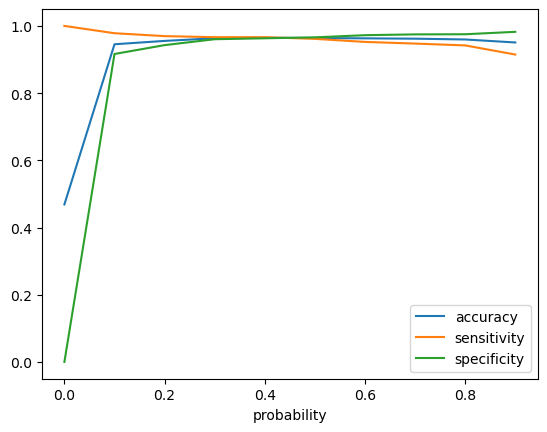

In [312]:
cutoff_data.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

### let's Add a Prediction , based on  Accuracy-Sensitivity-Specificity:- 

In [315]:
y_train_pred_dataset['Predicted_ass'] = y_train_pred_dataset['Conversion_Prob'].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_dataset.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600899           0             0.012           0      1      0   
1        616706           1             0.961           1      1      1   
2        606035           1             0.997           1      1      1   
3        580754           0             0.045           0      1      0   
4        620918           0             0.042           0      1      0   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900   Predicted_ass  
0      0      0      0      0      0      0      0      0               0  
1      1      1      1      1      1      1      1      1               1  
2      1      1      1      1      1      1      1      1               1  
3      0      0      0      0      0      0      0      0               0  
4      0      0      0      0      0      0      0      0               0

In [317]:
round(metrics.accuracy_score(y_train_pred_dataset['Converted'], y_train_pred_dataset['Predicted_ass']), 4)

0.9647

### lets Precision & Recall Tradeoff:- 

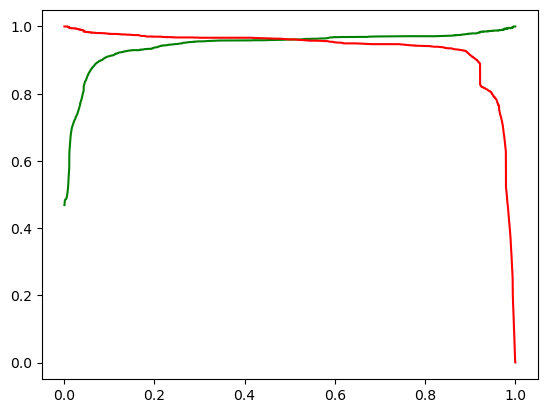

In [326]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_dataset['Converted'], y_train_pred_dataset['Conversion_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- as per the above curve, we can see that the optimal cut-off is around 0.45

### Let's Add a Prediction , based on a Precision-Recall:-

In [330]:
y_train_pred_dataset['Predicted_pr'] = y_train_pred_dataset['Conversion_Prob'].map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_dataset.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600899           0             0.012           0      1      0   
1        616706           1             0.961           1      1      1   
2        606035           1             0.997           1      1      1   
3        580754           0             0.045           0      1      0   
4        620918           0             0.042           0      1      0   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900   Predicted_ass  \
0      0      0      0      0      0      0      0      0               0   
1      1      1      1      1      1      1      1      1               1   
2      1      1      1      1      1      1      1      1               1   
3      0      0      0      0      0      0      0      0               0   
4      0      0      0      0      0      0      0      0               0   

    Predicted_pr  
0              0  
1              1  
2              1  
3              0  
4              0

In [332]:
round(metrics.accuracy_score(y_train_pred_dataset['Converted'], y_train_pred_dataset['Predicted_pr']), 4)

0.9645

- In the above Training Set, We can not see a considerable difference in Accuracy when using optimal A-S-S or P-R curve cutoffs

**Findings:-**
- The area under curve for ROC Curve = 0.99 which is extremely good.
- Accuracy is :        0.9626
- Sensitivity is :      0.9592
- Specificity is :      0.9656
- Accuracy-Sensitivity-Specificity curves intersect around 0.4
- Precision-Recall curves intersect around 0.45
- No difference in Accuracy whether using A-S-S or P-R optimal threshold

# Step - 8. Predictions on Test Set data:

In [337]:
y_test_pred_dataset = pd.DataFrame({'Lead Number': y_test.index, 'Converted': y_test.values,
                              'Conversion_Prob': y_test_predi.values})
y_test_pred_dataset.head()

Lead Number  Converted  Conversion_Prob
0       584655          0            0.022
1       596539          0            0.047
2       657390          0            0.010
3       609020          1            0.991
4       596303          1            0.988

### lets Use 0.4 as cut-off based,  on the Accuracy-Sensitivity-Specificity Curve:-

In [345]:
y_test_pred_dataset['Predicted_ass'] = y_test_pred_dataset['Conversion_Prob'].map(lambda x : 1 if x > 0.4 else 0)
y_test_pred_dataset.head()

Lead Number  Converted  Conversion_Prob  Predicted_pr  Predicted_ass
0       584655          0            0.022             0              0
1       596539          0            0.047             0              0
2       657390          0            0.010             0              0
3       609020          1            0.991             1              1
4       596303          1            0.988             1              1

### let's Use 0.45 as optimal cut-off based,  on Precision-Recall Curve:-

In [347]:
y_test_pred_dataset['Predicted_pr'] = y_test_pred_dataset['Conversion_Prob'].map(lambda x : 1 if x > 0.45 else 0)
y_test_pred_dataset.head()

Lead Number  Converted  Conversion_Prob  Predicted_pr  Predicted_ass
0       584655          0            0.022             0              0
1       596539          0            0.047             0              0
2       657390          0            0.010             0              0
3       609020          1            0.991             1              1
4       596303          1            0.988             1              1

In [349]:
print('Accuracy-Sensitivity-Specificity Cut-off is: ')
accu_score_test = round(metrics.accuracy_score(y_test_pred_dataset['Converted'], y_test_pred_dataset['Predicted_ass']),4)
accu_score_test

Accuracy-Sensitivity-Specificity Cut-off is: 


0.9677

In [351]:
print('Precision-Recall Cut-off is : ')
accu_score_test = round(metrics.accuracy_score(y_test_pred_dataset['Converted'], y_test_pred_dataset['Predicted_pr']),4)
accu_score_test

Precision-Recall Cut-off is : 


0.966

**Findlings**
- Using above Curve's Optimal Cut-off gives us a slightly better Accuracy.
- So, we can use*predicted_ass*

## Evaluation Metrics:- 

###  Test Set:- Classification Report & Confusion Matrix :- 

In [355]:
#Training Performance
print("Testing Performance is :")
classification_report1 = metrics.classification_report(y_test_pred_dataset['Converted'], y_test_pred_dataset['Predicted_ass'])
print(classification_report1)

print("Confusion Matrix (Testing) is:")
confusion_matrix1 = metrics.confusion_matrix(y_test_pred_dataset['Converted'], y_test_pred_dataset['Predicted_ass'])
print(confusion_matrix1)

Testing Performance is :
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       660
           1       0.95      0.97      0.96       518

    accuracy                           0.97      1178
   macro avg       0.97      0.97      0.97      1178
weighted avg       0.97      0.97      0.97      1178

Confusion Matrix (Testing) is:
[[636  24]
 [ 14 504]]


### Checking Accuracy:- 

In [358]:
round(metrics.accuracy_score(y_test_pred_dataset['Converted'], y_test_pred_dataset['Predicted_ass']),4)

0.9677

In [364]:
# Let's Check the other metrics as well for the evaluaion:-

TP = confusion_matrix1[1,1] # true positive 
TN = confusion_matrix1[0,0] # true negatives
FP = confusion_matrix1[0,1] # false positives
FN = confusion_matrix1[1,0] # false negatives

### Checking Sensitivity : (Recall)

In [367]:
round(TP/(TP+FN), 4)

0.973

### Checking Specificity:- 

In [370]:
round(TN/(TN+FP), 4)

0.9636

### Checking False Postive Rate : (1 - Specificity):-

In [373]:
round(FP/ (TN+FP), 4)

0.0364

### Checking Positive predictive value : (Precision):-

In [376]:
round(TP / (TP+FP), 4)

0.9545

### Checking Negative predictive value:- 

In [379]:
round(TN / (TN+ FN), 4)

0.9785

In [383]:
y_test_pred_dataset.head()

Lead Number  Converted  Conversion_Prob  Predicted_pr  Predicted_ass
0       584655          0            0.022             0              0
1       596539          0            0.047             0              0
2       657390          0            0.010             0              0
3       609020          1            0.991             1              1
4       596303          1            0.988             1              1

Testing Performance is:


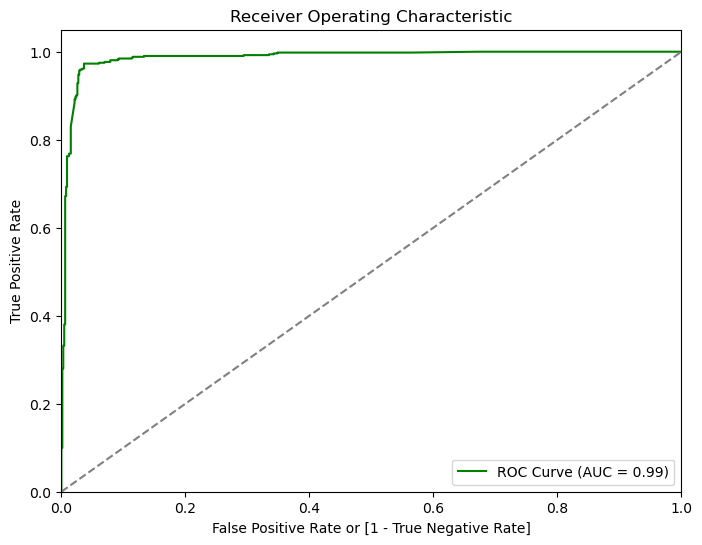

In [385]:
# Ploting ROC AUC for Test set Data
print("Testing Performance is:")
plot_roc_auc(y_test_pred_dataset['Converted'], y_test_pred_dataset['Conversion_Prob'])

#  Step:- 10 Lead Score Generation
## Combining both Train set and Test Set:- 

In [388]:
y_train_pred_dataset= y_train_pred_dataset[['Lead Number', 'Conversion_Prob']]
y_test_pred_dataset = y_test_pred_dataset[['Lead Number', 'Conversion_Prob']]

In [390]:
y_lead_score1 = pd.concat([y_train_pred_dataset, y_test_pred_dataset], axis=0)
y_lead_score1.head()

Lead Number  Conversion_Prob
0       600899            0.012
1       616706            0.961
2       606035            0.997
3       580754            0.045
4       620918            0.042

In [392]:
y_train_pred_dataset.shape, y_test_pred_dataset.shape, y_lead_score1.shape

((4709, 2), (1178, 2), (5887, 2))

## Lets Assign Lead Score :- 

In [395]:
y_lead_score1['Lead Score'] = y_lead_score1['Conversion_Prob'].map(lambda x: round(x*100))
y_lead_score1.head()

Lead Number  Conversion_Prob  Lead Score
0       600899            0.012           1
1       616706            0.961          96
2       606035            0.997         100
3       580754            0.045           5
4       620918            0.042           4

In [397]:
def assigning_priority(score):
    if score > 80:
        return 'Very High'
    elif score > 60:
        return 'High'
    elif score > 40:
        return 'Medium'
    else:
        return 'Low'

In [399]:
y_lead_score1['Priority'] = y_lead_score1['Lead Score'].apply(assigning_priority)
y_lead_score1.head()

Lead Number  Conversion_Prob  Lead Score   Priority
0       600899            0.012           1        Low
1       616706            0.961          96  Very High
2       606035            0.997         100  Very High
3       580754            0.045           5        Low
4       620918            0.042           4        Low


##  Key Findings:
- **Feature Optimization**: Reduced feature set while retaining high predictive performance.
- **Overall Accuracy**: Achieved 96.14% (Mean CV Accuracy) on the training set with consistent test set performance.
- **High Sensitivity (Recall)**: 95.92%, effectively identifying actual conversions.
- **ROC AUC Score**: 0.99, indicating excellent discrimination between converted and non-converted leads.
- **Optimal Threshold**: Probability threshold of 0.4 determined via Accuracy-Sensitivity-Specificity curve analysis.
- **High Specificity**: 96.56%, accurately identifying non-converting leads.



---

## Recommendations: 

**Lead Scoring**: Use the model to prioritize high-probability leads for sales and marketing teams.

**Model Validation**: Continuously retrain the model with updated data to stay aligned with changing trends.

**Campaign Optimization**: Target high-conversion segments and activities identified by the model.

**Metric Monitoring**: Regularly evaluate sensitivity, specificity, and accuracy to ensure performance.

**Feature Refinement**: Incorporate additional data sources or metrics to enhance predictions.

**Threshold Strategy**: Adjust probability thresholds based on business goals for optimal resource allocation.